In [2]:
# Import packages and load the data
import numpy as np
import numpy.linalg as lin
import scipy.stats as sts
import scipy.integrate as intgr
import scipy.optimize as opt
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy.linalg as lin
cmap1 = matplotlib.cm.get_cmap('summer')
# This next command is specifically for Jupyter Notebook
%matplotlib notebook

incomes= np.loadtxt('incomes.txt', delimiter=',', unpack=True)


## 1a)

(0, 150000)

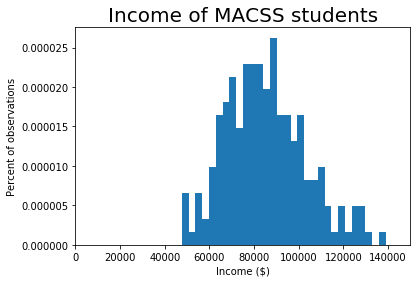

In [7]:
fig,ax = plt.subplots()
ax.hist(incomes, 30, normed=True)
ax.set_title('Income of MACSS students', fontsize=20)
ax.set_xlabel(r'Income (\$)')
ax.set_ylabel('Percent of observations')
ax.set_xlim([0,150000])

## 1b)

In [31]:
def lognorm_pdf(sigma, mu, xvec):
#     xvec = np.linspace(lb,ub,grain)

    pdf_vals    = (1/(xvec*sigma * np.sqrt(2 * np.pi)) *
                    np.exp( - (np.log(xvec) - mu)**2 / (2 * sigma**2)))

    return pdf_vals

# grain = 1000

# dist_pts = np.linspace(0.01, 150000,grain)
# mu_1 = 11.0
# sig_1 = 0.5
# pdf_vals = trunc_lognorm_pdf(0.5,11.0,dist_pts) #, plot=False

# fig,ax = plt.subplots()
# ax.hist(incomes, 30, normed=True)
# ax.set_title('Income of MACSS students', fontsize=20)
# ax.set_xlabel(r'Income (\$)')
# ax.set_ylabel('Percent of observations')
# ax.set_xlim([0,150000])
# ax.plot(dist_pts, pdf_vals,linewidth=2, color='g', label='2: $\mu$=11,$\sigma$=0.5')
# ax.grid(b=True, which='major', color='0.65', linestyle='-')
# # plt.title(f'Plot of Log Normal PDF with sigma={sig_1} and mean={mu_1}')
# # plt.ylabel(r' (\$000s)')
# ax.legend(loc='upper left')

In [34]:
def data_moments(xvals):
    mean_data = xvals.mean()
    var_data = xvals.var()
    return mean_data, var_data

def model_moments(mu, sigma):
    var = sigma **2
    mean_model = np.exp(mu + (var/2))
    sigma_model = np.sqrt((np.exp(var)-1)*(np.exp(2*mu + var)))
    return mean_model, sigma_model


def err_vec(xvals, mu, sigma):
#     mean_data, var_data = data_moments(xvals)
#     moms_data = np.array([[mean_data], [var_data]])
#     mean_model, var_model = model_moments(mu, sigma)
#     moms_model = np.array([[mean_model], [var_model]])
#     err_vec = (moms_model - moms_data) / moms_data
    dm = np.array(data_moments(xvals)).reshape((2,1))
    mm = np.array(model_moments(mu, sigma)).reshape((2,1))
    return ((dm - mm)/dm)
#     return err_vec


def criterion(params, *args):
    mu, sigma = params
    xvals, W = args
    err = err_vec(xvals, mu, sigma)
    crit_val = np.dot(np.dot(err.T, W), err)
    
    return crit_val

In [35]:
# metrics from data
mu_init = np.log(incomes).mean()
sigma_init = np.sqrt(np.log(incomes).var())

mu_init = 10
sig_init = 0.01
params_init = np.array([mu_init, sig_init])
W_hat = np.eye(2)
gmm_args = (incomes,  W_hat)
results_1 = opt.minimize(criterion, params_init, args=(gmm_args),
                       method='L-BFGS-B', bounds=((1e-10, None), (1e-10, None)))
mu_GMM1, sig_GMM1 = results_1.x
print('mu_GMM1=', mu_GMM1, ' sig_GMM1=', sig_GMM1)

mu_GMM1= 3.11189095856  sig_GMM1= 4.05999191206
